In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
import numpy
from datetime import datetime
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
colunas = ['instant', 'dteday', 'season','yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp','atemp','hum','windspeed','casual','registered','cnt']
train_df = pd.read_csv("hour.csv")
train_df2 = pd.read_csv("hour.csv")
train_df.__delitem__('instant')
train_df2.__delitem__('instant')

train_df['dteday'] = train_df['dteday'].apply(lambda v:datetime.strptime(v,'%Y-%m-%d'))
train_df['dteday'] = train_df['dteday'].apply(lambda v:v.day)
train_df['day'] = train_df['dteday']



In [3]:
X_df = train_df
Y_df = train_df['casual']
X_df.__delitem__('cnt')
X_df.__delitem__('registered')
X_df.__delitem__('casual')



X = X_df
Y = Y_df

tamanho_de_treino = 13911

treino_dados = X[:tamanho_de_treino]
treino_marcacoes = Y[:tamanho_de_treino]

teste_dados = X[tamanho_de_treino:]
teste_marcacoes = Y[tamanho_de_treino:]

In [4]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()

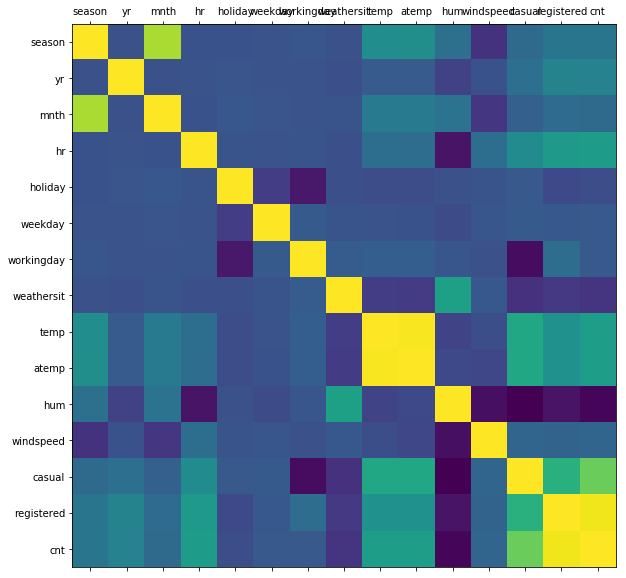

In [5]:
plot_corr(train_df2)

In [6]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression() 
regr.fit(treino_dados, treino_marcacoes)
r2_train = regr.score(treino_dados, treino_marcacoes)
print('Scores com regressão linear: %.2f' % r2_train)

Scores com regressão linear: 0.45


In [7]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(treino_dados, treino_marcacoes) 
neigh.score(teste_dados, teste_marcacoes)

0.38057419084916844

In [8]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(treino_dados, treino_marcacoes)
modelo.score(teste_dados, teste_marcacoes)

0.0328719723183391